# Chapter 9: Files and Exceptions
## Jarrod Sims

### 9.2 Files
* Python views a text file as a sequence of characters and a binary file as a sequence of bytes

### 9.3 Text-File Processing

In [17]:
print('Jarrod Sims')

Jarrod Sims


__Wrinting to a Text File__

In [2]:
with open('accounts.txt', mode='w') as accounts:
    accounts.write('100 Jones 24.98\n')
    accounts.write('200 Doe 345.67\n')
    accounts.write('300 White 0.00\n')
    accounts.write('400 Stone -42.16\n')
    accounts.write('500 Rich 224.62\n')

In [3]:
with open('grades.txt', mode='w') as grades:
    grades.write('1 Red A\n')
    grades.write('2 Green B\n')
    grades.write('3 White A\n')

__Reading Data from a Text File__

In [4]:
with open('accounts.txt', mode='r') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    for record in accounts:
        account, name, balance = record.split()
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White           0.00
400       Stone         -42.16
500       Rich          224.62


In [5]:
with open('grades.txt', mode='r') as grades:
    print(f'{"ID":<4}{"Name":<7}{"Grade"}')
    for record in grades:
        student_id, name, grade = record.split()
        print(f'{student_id:<4}{name:<7}{grade}')

ID  Name   Grade
1   Red    A
2   Green  B
3   White  A


### 9.4 Updating Text Files

In [16]:
print('Jarrod Sims')

Jarrod Sims


__Updating a File__

In [10]:
accounts = open('accounts.txt', 'r')
temp_file = open('temp_file.txt', 'w')
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if account != '300':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Williams', balance])
            temp_file.write(new_record + '\n')

__OS Module File-Processing__

In [11]:
import os 
os.remove('accounts.txt')

In [12]:
os.rename('temp_file.txt', 'accounts.txt')

In [14]:
accounts = open('accounts.txt', 'r')
temp_file = open('temp_file.txt', 'w')
with accounts, temp_file:
    for record in accounts:
        account, name, balance = record.split()
        if name != 'Doe':
            temp_file.write(record)
        else:
            new_record = ' '.join([account, 'Smith', balance])
            temp_file.write(new_record + '\n')
import os
os.remove('accounts.txt')
os.rename('temp_file.txt', 'accounts.txt')

### 9.5 Serialization with JSON

In [15]:
print('Jarrod Sims')

Jarrod Sims


__JSON Data Format__

JSON objects can be:
* Strings
* numbers
* JSON Boolean values
* null
* arrays
* other JSON objects

__Python Standard Library Module json__

In [18]:
accounts_dict = {'accounts': [
    {'account': 100, 'name': 'Jones', 'balance': 24.98},
    {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

__Serializing an Object to JSON__

Converting objects to JSON

In [19]:
import json
with open('accounts.json', 'w') as accounts:
    json.dump(accounts_dict, accounts)

__Deserializing JSON Text__

In [20]:
with open('accounts.json', 'r') as accounts:
    accounts_json = json.load(accounts)

In [21]:
accounts_json

{'accounts': [{'account': 100, 'name': 'Jones', 'balance': 24.98},
  {'account': 200, 'name': 'Doe', 'balance': 345.67}]}

In [23]:
accounts_json['accounts']

[{'account': 100, 'name': 'Jones', 'balance': 24.98},
 {'account': 200, 'name': 'Doe', 'balance': 345.67}]

In [24]:
accounts_json['accounts'][0]

{'account': 100, 'name': 'Jones', 'balance': 24.98}

In [25]:
accounts_json['accounts'][1]

{'account': 200, 'name': 'Doe', 'balance': 345.67}

__Displaying the JSON Text__

In [26]:
with open('accounts.json', 'r') as accounts:
    print(json.dumps(json.load(accounts), indent=4))

{
    "accounts": [
        {
            "account": 100,
            "name": "Jones",
            "balance": 24.98
        },
        {
            "account": 200,
            "name": "Doe",
            "balance": 345.67
        }
    ]
}


In [27]:
import json
grades_dict = {'gradebook': 
    [{'student_id': 1, 'name': 'Red', 'grade': 'A'},
     {'student_id': 2, 'name': 'Green', 'grade': 'B'},
     {'student_id': 3, 'name': 'White', 'grade': 'A'}]}
with open('grades.json', 'w') as grades:
    json.dump(grades_dict, grades)
with open('grades.json', 'r') as grades:
    print(json.dumps(json.load(grades), indent=4))

{
    "gradebook": [
        {
            "student_id": 1,
            "name": "Red",
            "grade": "A"
        },
        {
            "student_id": 2,
            "name": "Green",
            "grade": "B"
        },
        {
            "student_id": 3,
            "name": "White",
            "grade": "A"
        }
    ]
}


### 9.6 Focus on Security: pickle Serialization and Deserialization

Pickle module can serialize objects but can be easily hacked and is no longer widely used

### 9.7 Additional Notes Regarding Files

* 'r' open a text file for reading
* 'w' open a text file for writing
* 'a' open a text file for appending at the end
* 'r+' open a text file reading and writing
* 'w+' open a text file reading and writing & existing file contents are deleted
* 'a+' oepn the text file reading adn epending at the end. New data is written at the end of the file. If it doesn't exist it is created.

### 9.8 Handling Exceptions

In [28]:
print('Jarrod Sims')

Jarrod Sims


__try Statements__

In [29]:
while True:
    # attempt to convert and divide values
    try:
        number1 = int(input('Enter numerator: '))
        number2 = int(input('Enter denominator: '))
        result = number1 / number2
    except ValueError:  # tried to convert non-numeric value to int
        print('You must enter two integers\n')
    except ZeroDivisionError:  # denominator was 0
        print('Attempted to divide by zero\n')
    else:  # executes only if no exceptions occur
        print(f'{number1:.3f} / {number2:.3f} = {result:.3f}')
        break  # terminate the loop

Enter numerator:  100
Enter denominator:  0


Attempted to divide by zero



Enter numerator:  100
Enter denominator:  hi


You must enter two integers



Enter numerator:  100
Enter denominator:  3


100.000 / 3.000 = 33.333


In [33]:
def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {x}')
try_it(10.7)

int(10.7) is 10


In [34]:
try_it('Python')

Python could not be converted to an integer


### 9.9 finally Clause

In [35]:
print('Jarrod Sims')

Jarrod Sims


In [36]:
try:
    print('try suite with no exceptions raised')
except:
    print('this will not execute')
else:
    print('else executes because no exceptions in the try suite')
finally:  
    print('finally always executes')

try suite with no exceptions raised
else executes because no exceptions in the try suite
finally always executes


In [37]:
try:
    print('try suite that raises an exception')
    int('hello')
    print('this will not execute')
except ValueError:
    print('a ValueError occurred')
else:
    print('else will not execute because an exception occurred')
finally:  
    print('finally always executes')

try suite that raises an exception
a ValueError occurred
finally always executes


In [39]:
open('gradez.txt')

FileNotFoundError: [Errno 2] No such file or directory: 'gradez.txt'

In [40]:
try:
    with open('gradez.txt', 'r') as accounts:
        print(f'{"ID":<3}{"Name":<7}{"Grade"}')
        for record in accounts:  
            student_id, name, grade = record.split()
            print(f'{student_id:<3}{name:<7}{grade}')
except FileNotFoundError:
    print('The file name you specified does not exist')

The file name you specified does not exist


In [44]:
def try_it(value):
    try:
        x = int(value)
    except ValueError:
        print(f'{value} could not be converted to an integer')
    else:
        print(f'int({value}) is {x}')
    finally:
        print('finally executed')
try_it(10.7)

int(10.7) is 10
finally executed


In [45]:
try_it('python')

python could not be converted to an integer
finally executed


### 9.10 Explicitly Raising an Exception

In [46]:
print('Jarrod Sims')

Jarrod Sims


* The raise statement raises an exception and creates an object of the  specified exception class

### 9.11 Stack Unwinding and Tracebacks

In [1]:
print('Jarrod Sims')

Jarrod Sims


In [2]:
def function1():
    function2()
    
def function2():
    raise Exception('An exception occurred')

function1()

Exception: An exception occurred

### 9.12 Working with CSV Files

In [3]:
print('Jarrod Sims')

Jarrod Sims


__Writing to a CSV File__

In [5]:
import csv

with open('accounts.csv', mode='w', newline='') as accounts:
    writer = csv.writer(accounts)
    writer.writerow([100, 'Jones', 24.98])
    writer.writerow([200, 'Doe', 345.67])
    writer.writerow([300, 'White', 0.00])
    writer.writerow([400, 'Stone', -42.16])
    writer.writerow([500, 'Rich', 224.62])  

__Reading from a CSV File__

In [6]:
with open('accounts.csv', 'r', newline='') as accounts:
    print(f'{"Account":<10}{"Name":<10}{"Balance":>10}')
    reader = csv.reader(accounts)
    for record in reader:  
        account, name, balance = record
        print(f'{account:<10}{name:<10}{balance:>10}')

Account   Name         Balance
100       Jones          24.98
200       Doe           345.67
300       White            0.0
400       Stone         -42.16
500       Rich          224.62


In [8]:
import csv
with open('grades.csv', mode = 'w', newline ='') as grades:
    writer = csv.writer(grades)
    writer.writerow([1, 'Red', 'A'])
    writer.writerow([2, 'Green', 'B'])
    writer.writerow([3, 'White', 'A'])

with open('grades.csv', 'r', newline='') as grades:
    print(f'{"ID":<4}{"Name":<7}{"Grade"}')
    reader = csv.reader(grades)
    for record in reader:  
        student_id, name, grade = record
        print(f'{student_id:<4}{name:<7}{grade}')

ID  Name   Grade
1   Red    A
2   Green  B
3   White  A


__Reading CSV Files into Pandas DataFrames__

In [10]:
import pandas as pd

df = pd.read_csv('accounts.csv', 
                 names=['account', 'name', 'balance'])

df

,account,name,balance
0,100,Jones,24.98
1,200,Doe,345.67
2,300,White,0.00
3,400,Stone,-42.16
4,500,Rich,224.62


In [11]:
# Saving a DataFrame to a CSV format
df.to_csv('accounts_from_dataframe.csv', index=False)

__Reading the Titanic Disaster Dataset__

In [21]:
import pandas as pd

titanic = pd.read_csv('https://vincentarelbundock.github.io/' +
    'Rdatasets/csv/carData/TitanicSurvival.csv')
                      
pd.set_option('display.precision', 2)  # format for floating-point values

titanic.head()

,Unnamed: 0,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [23]:
import pandas as pd

titanic = pd.read_csv('https://vincentarelbundock.github.io/' +
    'Rdatasets/csv/carData/TitanicSurvival.csv')
                      
pd.set_option('display.precision', 2)  # format for floating-point values

titanic.tail()

,Unnamed: 0,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


In [33]:
import pandas as pd

titanic = pd.read_csv('https://vincentarelbundock.github.io/' +
    'Rdatasets/csv/carData/TitanicSurvival.csv')
                      
pd.set_option('display.precision', 2)
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']
titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.00,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.92,1st
2,"Allison, Miss. Helen Loraine",no,female,2.00,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.00,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.00,1st


In [28]:
titanic.describe()

,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


In [29]:
(titanic.survived == 'yes').describe()

count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

__Sample Data Analysis with the Titanic Disaster Dataset__

In [34]:
titanic.describe()

,age
count,1046.00
mean,29.88
std,14.41
min,0.17
25%,21.00
50%,28.00
75%,39.00
max,80.00


In [35]:
(titanic.survived == 'yes').describe()

count      1309
unique        2
top       False
freq        809
Name: survived, dtype: object

### 9.12.5 Passenger Age Histogram

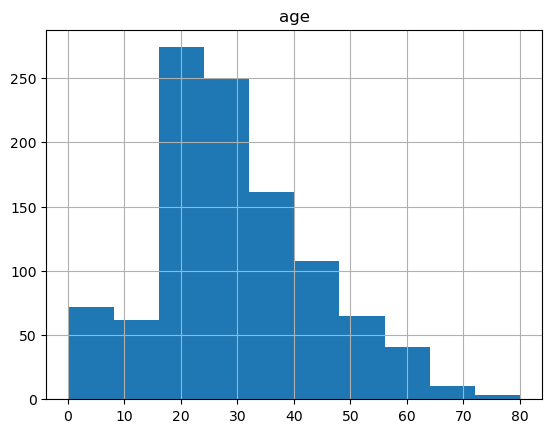

In [38]:
%matplotlib inline
histogram = titanic.hist()

In [ ]:
Jarrod Sims

### Bonus: Import and Analyze CSV

In [10]:
print('Jarrod Sims')

Jarrod Sims


In [8]:
import pandas as pd

engineering = pd.read_csv('https://raw.githubusercontent.com/jarrodsims/608--mod6/main/engineeringstudentdata.csv')
                      
pd.set_option('display.precision', 2) 

engineering.head()

,Anticipated Graduation Date,Race,GPA - Acum,A+ Days Absent,Credits - Acum
0,2024,B,2.19,2.0,11.0
1,2024,B,3.07,2.5,14.5
2,2024,B,3.75,2.5,14.0
3,2024,W,1.61,17.5,12.0
4,2024,W,1.97,6.0,12.5


In [13]:
print('Jarrod Sims')

Jarrod Sims


In [9]:
import pandas as pd

engineering = pd.read_csv('https://raw.githubusercontent.com/jarrodsims/608--mod6/main/engineeringstudentdata.csv')
                      
pd.set_option('display.precision', 2)
engineering.columns = ['Graduation Year', 'Race', 'GPA', 'Days Absent', 'Accumulated Credits']
engineering.head()

,Graduation Year,Race,GPA,Days Absent,Accumulated Credits
0,2024,B,2.19,2.0,11.0
1,2024,B,3.07,2.5,14.5
2,2024,B,3.75,2.5,14.0
3,2024,W,1.61,17.5,12.0
4,2024,W,1.97,6.0,12.5


In [14]:
print('Jarrod Sims')

Jarrod Sims


In [11]:
engineering.describe()

,Graduation Year,GPA,Days Absent,Accumulated Credits
count,81.00,81.00,81.00,81.00
mean,2024.62,2.87,7.03,11.26
std,1.26,1.07,10.39,8.78
min,2023.00,0.00,0.00,0.00
25%,2023.00,2.33,0.00,3.50
50%,2025.00,3.00,2.00,11.00
75%,2026.00,3.75,12.50,20.50
max,2026.00,4.15,51.00,27.50


In [15]:
print('Jarrod Sims')

Jarrod Sims


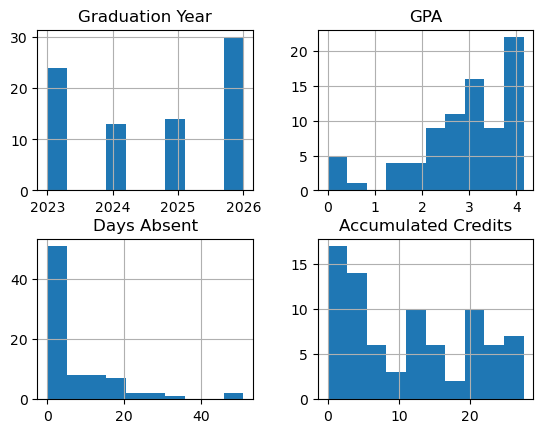

In [12]:
%matplotlib inline
histogram = engineering.hist()